In [16]:
import cv2 , sys
filename = r'C:\Users\User\Desktop\openCV_FastC\lecture\ch01\images\boat_mountains_lake_135258_1920x1080.jpg'

### 1. 영상 불러오기 
``` cv2.imread(filename, flags=None) -> retval ```
 - filename : 불러올 영상 파일 이름
 - flags : 
    - cv2.IMREAD_COLOR -> BGR 컬러 영상 읽기 (default) , shape=(rows,cols,3)
    - cv2.IMREAD_GRAYSCALE -> 그레이스케일 읽기 , shape=(rows,cols)
    - cv2.IMREAD_UNCHANGED -> 영상 파일 속석 그대로 읽기 ? 
 - retval : numpy.ndarray

In [17]:
cv2.imread(filename)

array([[[113,  87,  11],
        [107,  82,   2],
        [109,  85,   1],
        ...,
        [233, 211, 116],
        [235, 213, 118],
        [237, 215, 120]],

       [[104,  78,   1],
        [102,  77,   0],
        [112,  89,   3],
        ...,
        [236, 214, 119],
        [236, 214, 119],
        [235, 213, 118]],

       [[101,  76,   0],
        [104,  80,   0],
        [112,  87,   1],
        ...,
        [236, 214, 119],
        [236, 214, 119],
        [234, 212, 117]],

       ...,

       [[123, 128,   0],
        [125, 130,   1],
        [125, 129,   0],
        ...,
        [ 74,  97,   0],
        [ 71,  94,   0],
        [ 77, 100,   2]],

       [[125, 130,   1],
        [122, 127,   0],
        [124, 128,   0],
        ...,
        [ 77,  96,   3],
        [ 74,  93,   0],
        [ 75,  95,   0]],

       [[124, 129,   0],
        [123, 128,   0],
        [126, 130,   1],
        ...,
        [ 73,  90,   0],
        [ 71,  89,   0],
        [ 75,  94,   1]]

### 2. 영상 저장하기 
``` cv2.imwrite(filename, img, params=None) -> retval ```
 - filename : 불러올 영상 파일 이름
 - img : 저장할 영상 데이터 numpy.ndarray
 - params : 저장옵션, [cv2.IMWRITE_JPEG_QUALTY,90]
 - retval : True/False

### 3. 새 창 띄우기

```cv2.namedWindow(winname, flags=None) -> None```

 - winname : 창 고유 이름(문자열)
 - flags : 
    - cv2.WINDOW_NORMAL : 영상크기를 창 크기에 맞게 지정
    - cv2.WINDOW_AUTOSIZE : 창 크기를 영상 크기에 맞게 변경 


In [6]:
cv2.namedWindow("새창")

### 4. 창 닫기

```cv2.destroyWindow(winname) -> None``` 

```cv2.destroyAllWindows() -> None```

 - winname : 창 고유 이름(문자열)
 - 특정창만 닫고자 할 때는 destorywindow를, 전체를 닫을 때는 Allwindows를

In [4]:
cv2.destroyWindow("새창")

### 5. 창 크기 변경

```cv2.resizeWindow(winname, width, height) -> None```

 - winname : 창 고유 이름(문자열)
 - width , height = 변경할 창 가로/세로
 - 창크기 변경은 cv2.WINDOW_NORMAL 속성으로 생성되어야 동작

In [7]:
cv2.resizeWindow("새창",100,100);

### 6. 창 위치 이동

```cv2.moveWindow(winname, x, y) -> None```

 - winname : 창 고유 이름(문자열)
 - x, y = 이동할 위치 좌표

### 7. 영상 출력 하기

```cv2.imshow(winname, mat) -> None```

 - winname : 창 고유 이름(문자열)
 - mat = 출력할 영상 데이터 (matrix) 
 - 1) uint16/int32는 행렬 원소값을 255로 나눠서 출력 \
   2) float32/64 인 경우 행렬 원소값에 255 곱해서 출력 \ 
   3) 실제로는 cv2.waitkey() 를 호출해야 화면에 영상이 나타남( windown 내부 thred 차이에 의한!) 

In [19]:
img = cv2.imread(filename)
if img is None:
    print("영상로드실패")
    sys.exit()
cv2.namedWindow("이미지") 
cv2.imshow('이미지', img)
while True:
    key = cv2.waitKey() # ** 본 행이 없으면 q 키룰 2번 눌러야 창이 종료된다. **
    if key ==27:# esc key
        break
    elif key == ord("q"):
        break
cv2.destroyWindow("이미지")

### 8. 키보드 입력 대기
```cv2.waitKey(delay=None) -> retval```
- delay : ms, delay<=0 이면 무한히 기다림. 기본값 0
- retval :눌린 키의 ASCII code. 눌린키가 없으면 -1
   - 27(esc) 13 (enter) 9 (tab) 
   - ord('q') 표현도 함께쓰임

# OpenCV with Matplotlib 
 - matplotlib 은 RGB 채널을 사용하므로 cv2.cvtColor()함수로 변환
 - plt.imshow() 으로 그레이 영상 출력시 cmap = 'gray' 필요

In [21]:
import matplotlib.pyplot as plt
import cv2

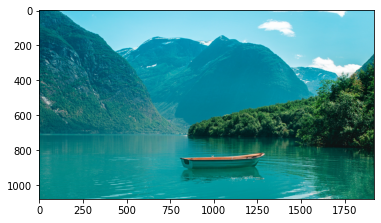

In [24]:
imgBGR = cv2.imread(filename)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgGray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# plt.axis('off')
plt.imshow(imgBGR)
plt.imshow(imgRGB)
plt.show()

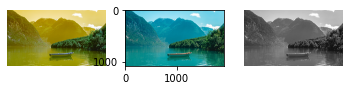

In [32]:
plt.subplot(131)
plt.axis('off')
plt.imshow(imgBGR)

plt.subplot(132)
# plt.axis('off')
plt.imshow(imgRGB)

plt.subplot(133)
plt.axis('off')
plt.imshow(imgGray, cmap='gray')

# plt.show()

### Making , 이미지 슬라이드 쇼
#### import os 

file_list = os.listdir('.\\ch1_images\\*.jpg')) \
img_files = [file for file in flie_list if file.endswith('.jpg')]

#### import glob
img_files = glob.glob('.\\ch1_images\\*.jpg')

In [34]:
import cv2 , glob
img_files= glob.glob('.\\ch01\\images\\*.jpg')
for f in img_files:
    print(f)


.\ch01\images\autumn_forest_park_128379_1920x1080.jpg
.\ch01\images\boat_mountains_lake_135258_1920x1080.jpg
.\ch01\images\forest_fog_trees_128751_1920x1080.jpg
.\ch01\images\pier_dock_sea_dusk_shore_118549_1920x1080.jpg
.\ch01\images\road_marking_evening_clouds_horizon_120298_1920x1080.jpg


In [8]:
import os
import sys
import glob
import cv2

# 이미지 파일을 모두 img_files 리스트에 추가

# os.listdir() 사용 방법
#file_list = os.listdir('.\\images')
#img_files = [os.path.join('.\\images', file) for file in file_list if file.endswith('.jpg')]

# glob.glob() 사용 방법
img_files = glob.glob('.\\ch01\\images\\*.jpg')

if not img_files:
    print("There are no jpg files in 'images' folder")
    sys.exit()

# 전체 화면으로 'image' 창 생성
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

# 무한 루프
cnt = len(img_files)
idx = 0

while True:
    img = cv2.imread(img_files[idx])

    if img is None:
        print('Image load failed!')
        break

    cv2.imshow('image', img)
    if cv2.waitKey(1000) >= 0:
        break

    idx += 1
    if idx >= cnt:
        idx = 0

cv2.destroyAllWindows()